<a href="https://colab.research.google.com/github/andrix17/proWine/blob/main/notebook/TF-IDFClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ProWine Project: Classificatori su TF-IDF** 
Script R per analisi dei vitigni dei vini usando un dataset di recensioni preso da Kaggle https://www.kaggle.com/zynicide/wine-reviews selezionando solo i vitigni che si vogliono analizzare.

## **Installazione librerie e download dei dati necessari**

In [1]:
install.packages("lsa")
install.packages("tm")
install.packages("RWeka")
install.packages("stopwords")
install.packages("class")
install.packages("sda")
install.packages("parallel")
install.packages("naivebayes")
library(naivebayes)
library(parallel)
library(sda)
library(class)
library(tm)
library(lsa)
library(RWeka)
library(stopwords)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘SnowballC’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘NLP’, ‘slam’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RWekajars’, ‘rJava’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘ISOcodes’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘entropy’, ‘corpcor’, ‘fdrtool’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘parallel’ is a base package, and should not be updated”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspec

In [2]:
#Aggiornare link da github
download.file('https://raw.githubusercontent.com/andrix17/proWine/main/dataset/winemag-data-130k-v2.csv?token=AMASMT7SXBAZQZZRDBJC3JTAWZIYW','wineData.csv')

In [3]:
wineData <- read.csv('wineData.csv')

## **Preparazione dati**

In [4]:
head(wineData)

,X,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,0,Italy,"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.",Vulkà Bianco,87,NA,Sicily & Sardinia,Etna,,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
2,1,Portugal,"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's already drinkable, although it will certainly be better from 2016.",Avidagos,87,15,Douro,,,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
3,2,US,"Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.",,87,14,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
4,3,US,"Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.",Reserve Late Harvest,87,13,Michigan,Lake Michigan Shore,,Alexander Peartree,,St. Julian 2013 Reserve Late Harvest Riesling (Lake Michigan Shore),Riesling,St. Julian
5,4,US,"Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy country wine, it's a good companion to a hearty winter stew.",Vintner's Reserve Wild Child Block,87,65,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child Block Pinot Noir (Willamette Valley),Pinot Noir,Sweet Cheeks
6,5,Spain,"Blackberry and raspberry aromas show a typical Navarran whiff of green herbs and, in this case, horseradish. In the mouth, this is fairly full bodied, with tomatoey acidity. Spicy, herbal flavors complement dark plum fruit, while the finish is fresh but grabby.",Ars In Vitro,87,15,Northern Spain,Navarra,,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (Navarra),Tempranillo-Merlot,Tandem


In [5]:
nrow(wineData)

[1] 129971

### **Eliminazione duplicati**

In [6]:
wineData <- wineData[!duplicated(wineData$description), ]

In [7]:
nrow(wineData)

[1] 119955

### **Trasformazione Shiraz in Syrah**

In [8]:
variety = wineData$variety
variety[variety=="Shiraz"]= "Syrah"
wines = wineData$winery
reviews = wineData$description
head(sort(table(variety), decreasing = T),20)

variety
              Pinot Noir               Chardonnay       Cabernet Sauvignon 
                   12277                    10867                     8837 
               Red Blend Bordeaux-style Red Blend                 Riesling 
                    8239                     6469                     4773 
                   Syrah          Sauvignon Blanc                     Rosé 
                    4616                     4574                     3220 
                  Merlot                 Nebbiolo                Zinfandel 
                    2895                     2602                     2530 
              Sangiovese                   Malbec           Portuguese Red 
                    2460                     2446                     2282 
             White Blend          Sparkling Blend              Tempranillo 
                    2179                     1971                     1671 
   Rhône-style Red Blend               Pinot Gris 
                    1343     

### **Selezione dei vitigni che si vogliono analizzare**

In [9]:
selection = variety=="Pinot Noir" | 
            variety=="Chardonnay" | 
            variety=="Cabernet Sauvignon" | 
            variety=="Riesling" | 
            variety=="Sauvignon Blanc" | 
            variety=="Syrah" | 
            variety=="Merlot" | 
            variety=="Nebbiolo" 
variety = variety[selection]
reviews = reviews[selection]

In [10]:
length(reviews)

[1] 51441

In [11]:
corpus <- Corpus(VectorSource(reviews))
inspect(corpus[1:5])

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5

[1] Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.                                                                                                             
[2] Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy country wine, it's a good companion to a hearty winter stew.                                                           
[3] Soft, supple plum envelopes an oaky structure in this Cabernet, supported by 15% Merlot. Coffee and chocolate complete the picture, finishing strong at the end, resulting in a value-priced wine of attractive flavor and immediate accessibility.                           

### **Trasformazione in lowercase**

In [12]:
corpus <- tm_map(corpus, tolower)
inspect(corpus[1:5])

Warning message in tm_map.SimpleCorpus(corpus, tolower):
“transformation drops documents”


<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5

[1] pineapple rind, lemon pith and orange blossom start off the aromas. the palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.                                                                                                             
[2] much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. nonetheless, if you think of it as a pleasantly unfussy country wine, it's a good companion to a hearty winter stew.                                                           
[3] soft, supple plum envelopes an oaky structure in this cabernet, supported by 15% merlot. coffee and chocolate complete the picture, finishing strong at the end, resulting in a value-priced wine of attractive flavor and immediate accessibility.                           

### **Eliminazione stopword**


In [13]:
stopwordlist <- stopwords::stopwords("en", source= "stopwords-iso")#Snowball, marimo, nltk, stopwords-iso, smart
corpus <- tm_map(corpus, removeWords, stopwordlist)
inspect(corpus[1:5])

Warning message in tm_map.SimpleCorpus(corpus, removeWords, stopwordlist):
“transformation drops documents”


<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5

[1] pineapple rind, lemon pith  orange blossom start   aromas.  palate   bit  opulent,  notes  honey-drizzled guava  mango      astringent, semidry finish.                                                                                                 
[2]    regular bottling  2012,      rough  tannic,  rustic, earthy, herbal characteristics. ,        pleasantly unfussy country wine,    companion   hearty winter stew.                                                                                    
[3] soft, supple plum envelopes  oaky structure   cabernet, supported  15% merlot. coffee  chocolate complete  picture, finishing strong   ,    -priced wine  attractive flavor   accessibility.                                                            
[4]  reduced,  wine offers  chalky, tannic backbone    juicy explosion  rich black cherry,   accented   firm oak  cigar box.                 

### **Eliminazione punteggiatura**

In [14]:
corpus <- tm_map(corpus, removePunctuation)
inspect(corpus[1:5])

Warning message in tm_map.SimpleCorpus(corpus, removePunctuation):
“transformation drops documents”


<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5

[1] pineapple rind lemon pith  orange blossom start   aromas  palate   bit  opulent  notes  honeydrizzled guava  mango      astringent semidry finish                                                                                                  
[2]    regular bottling  2012      rough  tannic  rustic earthy herbal characteristics         pleasantly unfussy country wine    companion   hearty winter stew                                                                                       
[3] soft supple plum envelopes  oaky structure   cabernet supported  15 merlot coffee  chocolate complete  picture finishing strong       priced wine  attractive flavor   accessibility                                                               
[4]  reduced  wine offers  chalky tannic backbone    juicy explosion  rich black cherry   accented   firm oak  cigar box                                    

### **Split TrainingSet**

In [15]:
tdmc <- TermDocumentMatrix(corpus)
tdmc

<<TermDocumentMatrix (terms: 25866, documents: 51441)>>
Non-/sparse entries: 1097510/1329475396
Sparsity           : 100%
Maximal term length: 29
Weighting          : term frequency (tf)

In [16]:
tdmc <- TermDocumentMatrix(corpus)
smp_size <- floor(0.67 * ncol(tdmc))

## set the seed to make your partition reproducible
set.seed(123)
train_index <- sample(seq_len(ncol(tdmc)), size = smp_size)

train_tdmc <- tdmc[, train_index]
test_tdmc <- tdmc[,-train_index]
train_tdmc

<<TermDocumentMatrix (terms: 25866, documents: 34465)>>
Non-/sparse entries: 734914/890736776
Sparsity           : 100%
Maximal term length: 29
Weighting          : term frequency (tf)

### **Eliminazione termini troppo sparsi**

In [17]:
train_tdmTemp <- removeSparseTerms(train_tdmc, 0.995)
train_tdmTemp

<<TermDocumentMatrix (terms: 672, documents: 34465)>>
Non-/sparse entries: 544676/22615804
Sparsity           : 98%
Maximal term length: 15
Weighting          : term frequency (tf)

In [18]:
test_tdmTemp <- test_tdmc[rownames(train_tdmTemp),]
test_tdmTemp

<<TermDocumentMatrix (terms: 672, documents: 16976)>>
Non-/sparse entries: 268326/11139546
Sparsity           : 98%
Maximal term length: 15
Weighting          : term frequency (tf)

### **Applicazione del Term Weighting**

In [19]:
train_tdm <-as.matrix(train_tdmTemp)
train_tdmPesata <-lw_logtf(train_tdm) * ( 1 - entropy( train_tdm) )
head(train_tdmPesata)

,2986,29925,29710,37529,2757,45404,46435,38938,9642,31313,⋯,16935,27444,16573,42678,6282,212,46565,37584,16562,37860
aromas,0,0,0.0944491,0.00000000,0.0944491,0.00000000,0,0,0,0,⋯,0.00000000,0.0944491,0.0944491,0,0,0,0.00000000,0,0,0
astringent,0,0,0.0000000,0.00000000,0.0000000,0.00000000,0,0,0,0,⋯,0.00000000,0.0000000,0.0000000,0,0,0,0.00000000,0,0,0
bit,0,0,0.0000000,0.19615284,0.0000000,0.00000000,0,0,0,0,⋯,0.00000000,0.0000000,0.0000000,0,0,0,0.00000000,0,0,0
blossom,0,0,0.0000000,0.00000000,0.0000000,0.00000000,0,0,0,0,⋯,0.00000000,0.0000000,0.0000000,0,0,0,0.00000000,0,0,0
finish,0,0,0.0000000,0.08714448,0.0000000,0.08714448,0,0,0,0,⋯,0.08714448,0.0000000,0.0000000,0,0,0,0.08714448,0,0,0
guava,0,0,0.0000000,0.00000000,0.0000000,0.00000000,0,0,0,0,⋯,0.00000000,0.0000000,0.0000000,0,0,0,0.00000000,0,0,0


In [20]:
test_tdm <-as.matrix(test_tdmTemp)
test_tdmPesata <-lw_logtf(test_tdm) * ( 1 - entropy( train_tdm) )
head(test_tdmPesata)

,1,4,9,13,15,20,23,27,29,34,⋯,51418,51419,51420,51423,51428,51429,51433,51435,51436,51438
aromas,0.09444910,0,0.0944491,0,0.00000000,0.09444910,0,0,0.09444910,0,⋯,0.00000000,0,0,0.00000000,0,0,0.0944491,0,0,0
astringent,0.29922444,0,0.0000000,0,0.00000000,0.00000000,0,0,0.00000000,0,⋯,0.00000000,0,0,0.00000000,0,0,0.0000000,0,0,0
bit,0.19615284,0,0.0000000,0,0.00000000,0.00000000,0,0,0.00000000,0,⋯,0.00000000,0,0,0.00000000,0,0,0.0000000,0,0,0
blossom,0.29564659,0,0.0000000,0,0.00000000,0.00000000,0,0,0.00000000,0,⋯,0.00000000,0,0,0.00000000,0,0,0.0000000,0,0,0
finish,0.08714448,0,0.0000000,0,0.08714448,0.08714448,0,0,0.08714448,0,⋯,0.08714448,0,0,0.08714448,0,0,0.0000000,0,0,0
guava,0.34672742,0,0.0000000,0,0.00000000,0.00000000,0,0,0.00000000,0,⋯,0.00000000,0,0,0.00000000,0,0,0.0000000,0,0,0


### **Eliminazione reviews con nessun termine**

In [21]:
train_tdmFinal <- train_tdmPesata[,apply(train_tdmPesata, 2, function(x) !all(x==rep(0, nrow(train_tdmPesata))))]
test_tdmFinal <- test_tdmPesata[,apply(test_tdmPesata, 2, function(x) !all(x==rep(0, nrow(test_tdmPesata))))]

In [22]:
train_variety <- variety[sapply(colnames(train_tdmFinal),strtoi)]
test_variety <- variety[sapply(colnames(test_tdmFinal),strtoi)]
train_reviews <- reviews[sapply(colnames(train_tdmFinal),strtoi)]
test_reviews <- reviews[sapply(colnames(test_tdmFinal),strtoi)]

## **Classificatori su TF-IDF**

### **Rocchio**

In [23]:
centroids <- t (centroids(t(train_tdmFinal), train_variety, lambda.var = 0, lambda.freqs = 0)$means)

Number of variables: 672 
Number of observations: 34462 
Number of classes: 8 

Specified shrinkage intensity lambda.freq (frequencies): 0 
Estimating variances (pooled across classes)
Specified shrinkage intensity lambda.var (variance vector): 0 



In [24]:
varietyResult <- apply(test_tdmFinal,2,function(x) rownames(centroids)[which.max(cosine(cbind(t(centroids),x))[10,1:8])])

In [25]:
print(paste("Accuracy:", sum(varietyResult == test_variety)/length(test_variety)))

[1] "Accuracy: 0.765419734904271"


In [26]:
for (x in unique(test_variety)){
  precision <- sum(test_variety[varietyResult==x]==x)/sum(varietyResult==x)
  recall <- sum(varietyResult[test_variety==x]==x)/sum(test_variety==x)
  f1 <- precision*recall*2/(precision+recall)
  print(x)
  print(paste("Precision: ",precision))
  print(paste("Recall: ",recall))
  print(paste("F1-Measure: ",f1))
  }

[1] "Riesling"
[1] "Precision:  0.776047904191617"
[1] "Recall:  0.837750484809308"
[1] "F1-Measure:  0.805719614547715"
[1] "Cabernet Sauvignon"
[1] "Precision:  0.787631271878646"
[1] "Recall:  0.683428957138036"
[1] "F1-Measure:  0.731839537405132"
[1] "Pinot Noir"
[1] "Precision:  0.858701298701299"
[1] "Recall:  0.811487481590574"
[1] "F1-Measure:  0.834427057041898"
[1] "Merlot"
[1] "Precision:  0.488593155893536"
[1] "Recall:  0.549732620320856"
[1] "F1-Measure:  0.517362858580775"
[1] "Chardonnay"
[1] "Precision:  0.847521865889213"
[1] "Recall:  0.825617722238001"
[1] "F1-Measure:  0.836426413465688"
[1] "Syrah"
[1] "Precision:  0.628066172276098"
[1] "Recall:  0.691582914572864"
[1] "F1-Measure:  0.658295964125561"
[1] "Sauvignon Blanc"
[1] "Precision:  0.689138576779026"
[1] "Recall:  0.724885095206829"
[1] "F1-Measure:  0.70656"
[1] "Nebbiolo"
[1] "Precision:  0.706781279847182"
[1] "Recall:  0.902439024390244"
[1] "F1-Measure:  0.79271558650241"


### **K-NN**

In [23]:
cl <- makeCluster(detectCores())

In [24]:
find_KNN <- function(trainX,trainY,X,K) names(sort(table(trainY[sapply(colnames(trainX), `%in%`, names(head(sort(cosine(X, trainX), decreasing = T),K)))]),decreasing=TRUE)[1])

In [25]:
KNN <- function(trainX,trainY,testX,testY,K){
  sapply(1:10, function(x) names(sort(table(trainY[sapply(colnames(trainX), `%in%`, names(head(sort(cosine(testX[,x], trainX), decreasing = T),K)))]),decreasing=TRUE)[1])==testY[x])
  }

In [26]:
clusterExport (cl, varlist = c("test_tdmFinal", "train_tdmFinal", "train_variety", "find_KNN","cosine"))

In [27]:
KNNResult30 <- parSapply(cl, 1:length(test_variety), function(x) find_KNN(train_tdmFinal,train_variety,test_tdmFinal[,x], 30))

In [29]:
print(paste("Accuracy:",sum(KNNResult30==test_variety)/length(test_variety)))

[1] "Accuracy: 0.753755522827688"


In [30]:
for (x in unique(test_variety)){
  precision <- sum(test_variety[KNNResult30==x]==x)/sum(KNNResult30==x)
  recall <- sum(KNNResult30[test_variety==x]==x)/sum(test_variety==x)
  f1 <- precision*recall*2/(precision+recall)
  print(x)
  print(paste("Precision: ",precision))
  print(paste("Recall: ",recall))
  print(paste("F1-Measure: ",f1))
  }

[1] "Riesling"
[1] "Precision:  0.842030021443888"
[1] "Recall:  0.76147382029735"
[1] "F1-Measure:  0.799728445349627"
[1] "Cabernet Sauvignon"
[1] "Precision:  0.651200431615862"
[1] "Recall:  0.814714816064799"
[1] "F1-Measure:  0.72383808095952"
[1] "Pinot Noir"
[1] "Precision:  0.762093227792436"
[1] "Recall:  0.850760922925871"
[1] "F1-Measure:  0.80398979355138"
[1] "Merlot"
[1] "Precision:  0.850393700787402"
[1] "Recall:  0.231016042780749"
[1] "F1-Measure:  0.363330529857023"
[1] "Chardonnay"
[1] "Precision:  0.737000928505107"
[1] "Recall:  0.901732462368645"
[1] "F1-Measure:  0.811086984289181"
[1] "Syrah"
[1] "Precision:  0.826388888888889"
[1] "Recall:  0.448492462311558"
[1] "F1-Measure:  0.5814332247557"
[1] "Sauvignon Blanc"
[1] "Precision:  0.833178005591799"
[1] "Recall:  0.586999343401182"
[1] "F1-Measure:  0.688751926040062"
[1] "Nebbiolo"
[1] "Precision:  0.897810218978102"
[1] "Recall:  0.9"
[1] "F1-Measure:  0.898903775883069"


### **Multinomial Naive Bayes**

In [138]:
mnb <- multinomial_naive_bayes(t(train_tdmFinal), train_variety, laplace=0.01)

In [139]:
summary(mnb)


============================ Multinomial Naive Bayes ============================ 
 
- Call: multinomial_naive_bayes(x = t(train_tdmFinal), y = train_variety,      laplace = 0.01) 
- Laplace: 0.01 
- Classes: 8 
- Samples: 34462 
- Features: 672 
- Prior probabilities: 
    - Cabernet Sauvignon: 0.1704
    - Chardonnay: 0.2131
    - Merlot: 0.0568
    - Nebbiolo: 0.0517
    - Pinot Noir: 0.238
    - Riesling: 0.0936
    - Sauvignon Blanc: 0.0885
    - Syrah: 0.0877

--------------------------------------------------------------------------------- 


In [145]:
bayesResult<- mnb %class% t(test_tdmFinal)

In [147]:
print(paste("Accuracy:",sum(bayesResult==test_variety)/length(test_variety)))

[1] "Accuracy: 0.759293078055965"


In [148]:
for (x in unique(test_variety)){
  precision <- sum(test_variety[bayesResult==x]==x)/sum(bayesResult==x)
  recall <- sum(bayesResult[test_variety==x]==x)/sum(test_variety==x)
  f1 <- precision*recall*2/(precision+recall)
  print(x)
  print(paste("Precision: ",precision))
  print(paste("Recall: ",recall))
  print(paste("F1-Measure: ",f1))
  }

[1] "Riesling"
[1] "Precision:  0.89928628072958"
[1] "Recall:  0.733031674208145"
[1] "F1-Measure:  0.807692307692308"
[1] "Cabernet Sauvignon"
[1] "Precision:  0.653366583541147"
[1] "Recall:  0.795815052311846"
[1] "F1-Measure:  0.717589774802191"
[1] "Pinot Noir"
[1] "Precision:  0.726893148605048"
[1] "Recall:  0.940108001963672"
[1] "F1-Measure:  0.819865139676763"
[1] "Merlot"
[1] "Precision:  0.979591836734694"
[1] "Recall:  0.0513368983957219"
[1] "F1-Measure:  0.0975609756097561"
[1] "Chardonnay"
[1] "Precision:  0.759331348752004"
[1] "Recall:  0.941777904004544"
[1] "F1-Measure:  0.840770791075051"
[1] "Syrah"
[1] "Precision:  0.862547288776797"
[1] "Recall:  0.42964824120603"
[1] "F1-Measure:  0.573584905660377"
[1] "Sauvignon Blanc"
[1] "Precision:  0.893203883495146"
[1] "Recall:  0.543663821405121"
[1] "F1-Measure:  0.675918367346939"
[1] "Nebbiolo"
[1] "Precision:  0.987142857142857"
[1] "Recall:  0.842682926829268"
[1] "F1-Measure:  0.909210526315789"


### **Bernoulli Naive Bayes**

In [69]:
bnb <- bernoulli_naive_bayes(as.matrix((t(train_tdmFinal)>0)+0), train_variety, laplace=0.0001)

In [70]:
summary(bnb)


============================= Bernoulli Naive Bayes ============================= 
 
- Call: bernoulli_naive_bayes(x = as.matrix((t(train_tdmFinal) > 0) +      0), y = train_variety, laplace = 1e-04) 
- Laplace: 1e-04 
- Classes: 8 
- Samples: 34462 
- Features: 672 
- Prior probabilities: 
    - Cabernet Sauvignon: 0.1704
    - Chardonnay: 0.2131
    - Merlot: 0.0568
    - Nebbiolo: 0.0517
    - Pinot Noir: 0.238
    - Riesling: 0.0936
    - Sauvignon Blanc: 0.0885
    - Syrah: 0.0877

--------------------------------------------------------------------------------- 


In [71]:
bayesResult<- bnb %class% t(test_tdmFinal)

In [72]:
print(paste("Accuracy:",sum(bayesResult==test_variety)/length(test_variety)))

[1] "Accuracy: 0.705449189985273"


In [73]:
for (x in unique(test_variety)){
  precision <- sum(test_variety[bayesResult==x]==x)/sum(bayesResult==x)
  recall <- sum(bayesResult[test_variety==x]==x)/sum(test_variety==x)
  f1 <- precision*recall*2/(precision+recall)
  print(x)
  print(paste("Precision: ",precision))
  print(paste("Recall: ",recall))
  print(paste("F1-Measure: ",f1))
  }

[1] "Riesling"
[1] "Precision:  0.96045197740113"
[1] "Recall:  0.549450549450549"
[1] "F1-Measure:  0.699013157894737"
[1] "Cabernet Sauvignon"
[1] "Precision:  0.746906636670416"
[1] "Recall:  0.672291596355046"
[1] "F1-Measure:  0.707637655417407"
[1] "Pinot Noir"
[1] "Precision:  0.652127470179811"
[1] "Recall:  0.899116347569956"
[1] "F1-Measure:  0.755959137343927"
[1] "Merlot"
[1] "Precision:  0.528995756718529"
[1] "Recall:  0.4"
[1] "F1-Measure:  0.455542021924482"
[1] "Chardonnay"
[1] "Precision:  0.675105485232067"
[1] "Recall:  0.95427435387674"
[1] "F1-Measure:  0.790774299835255"
[1] "Syrah"
[1] "Precision:  0.8672"
[1] "Recall:  0.340452261306533"
[1] "F1-Measure:  0.488949030221019"
[1] "Sauvignon Blanc"
[1] "Precision:  0.761979575805185"
[1] "Recall:  0.636900853578464"
[1] "F1-Measure:  0.693848354792561"
[1] "Nebbiolo"
[1] "Precision:  1"
[1] "Recall:  0.273170731707317"
[1] "F1-Measure:  0.42911877394636"


## **Applicazione di LSA**

### **Creazione spazio LSA**

In [74]:
words <- rownames(train_tdmFinal)
head(words)

[1] "aromas"     "astringent" "bit"        "blossom"    "finish"    
[6] "guava"

In [75]:
lsar <- lsa(train_tdmFinal)

In [76]:
length(lsar$sk)

[1] 265

### **Grafico degli autovalori determinati in LSA**

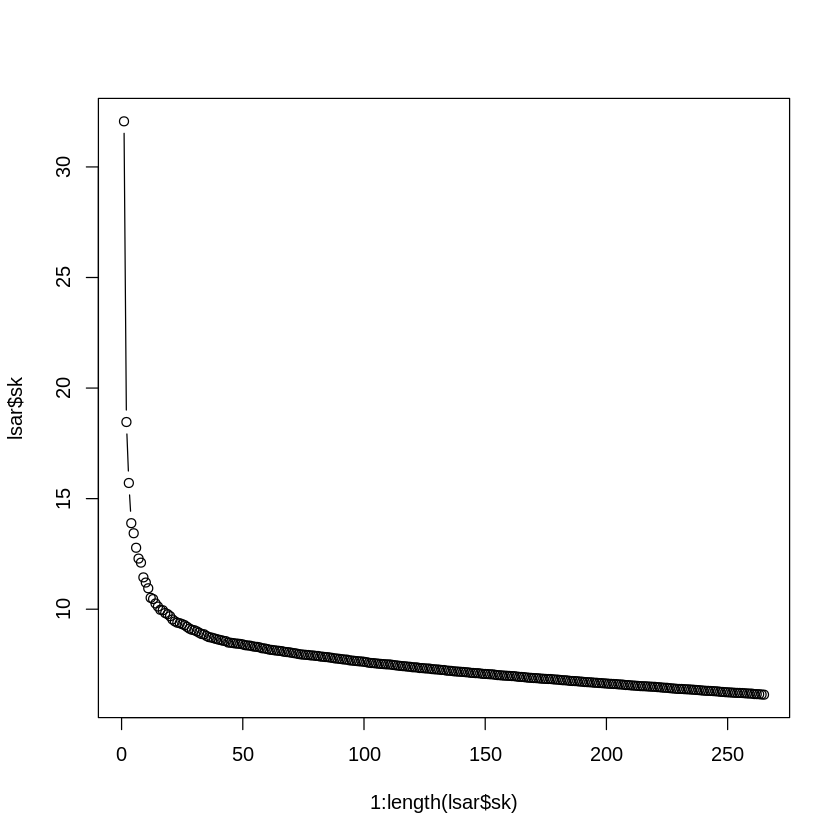

In [79]:
plot(1:length(lsar$sk), lsar$sk, type="b")